Here, we will be performing EDA on the cleaned dataset

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new_df = pd.read_csv('../Data/cleaned_dataset.csv')

In [3]:
df = new_df.copy()

In [4]:
df.head()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded,depression_label_encoded
0,0,2,2,3,2,2,2,2,3,2,1,2,1,1,5
1,0,3,2,2,2,2,2,2,2,2,2,3,0,1,4
2,0,0,0,0,0,0,0,0,0,0,2,3,0,1,0
3,0,2,1,2,1,2,1,2,2,1,2,3,0,1,3
4,0,1,3,3,3,1,3,0,3,3,1,2,0,1,5


Let's plot density plots for all features

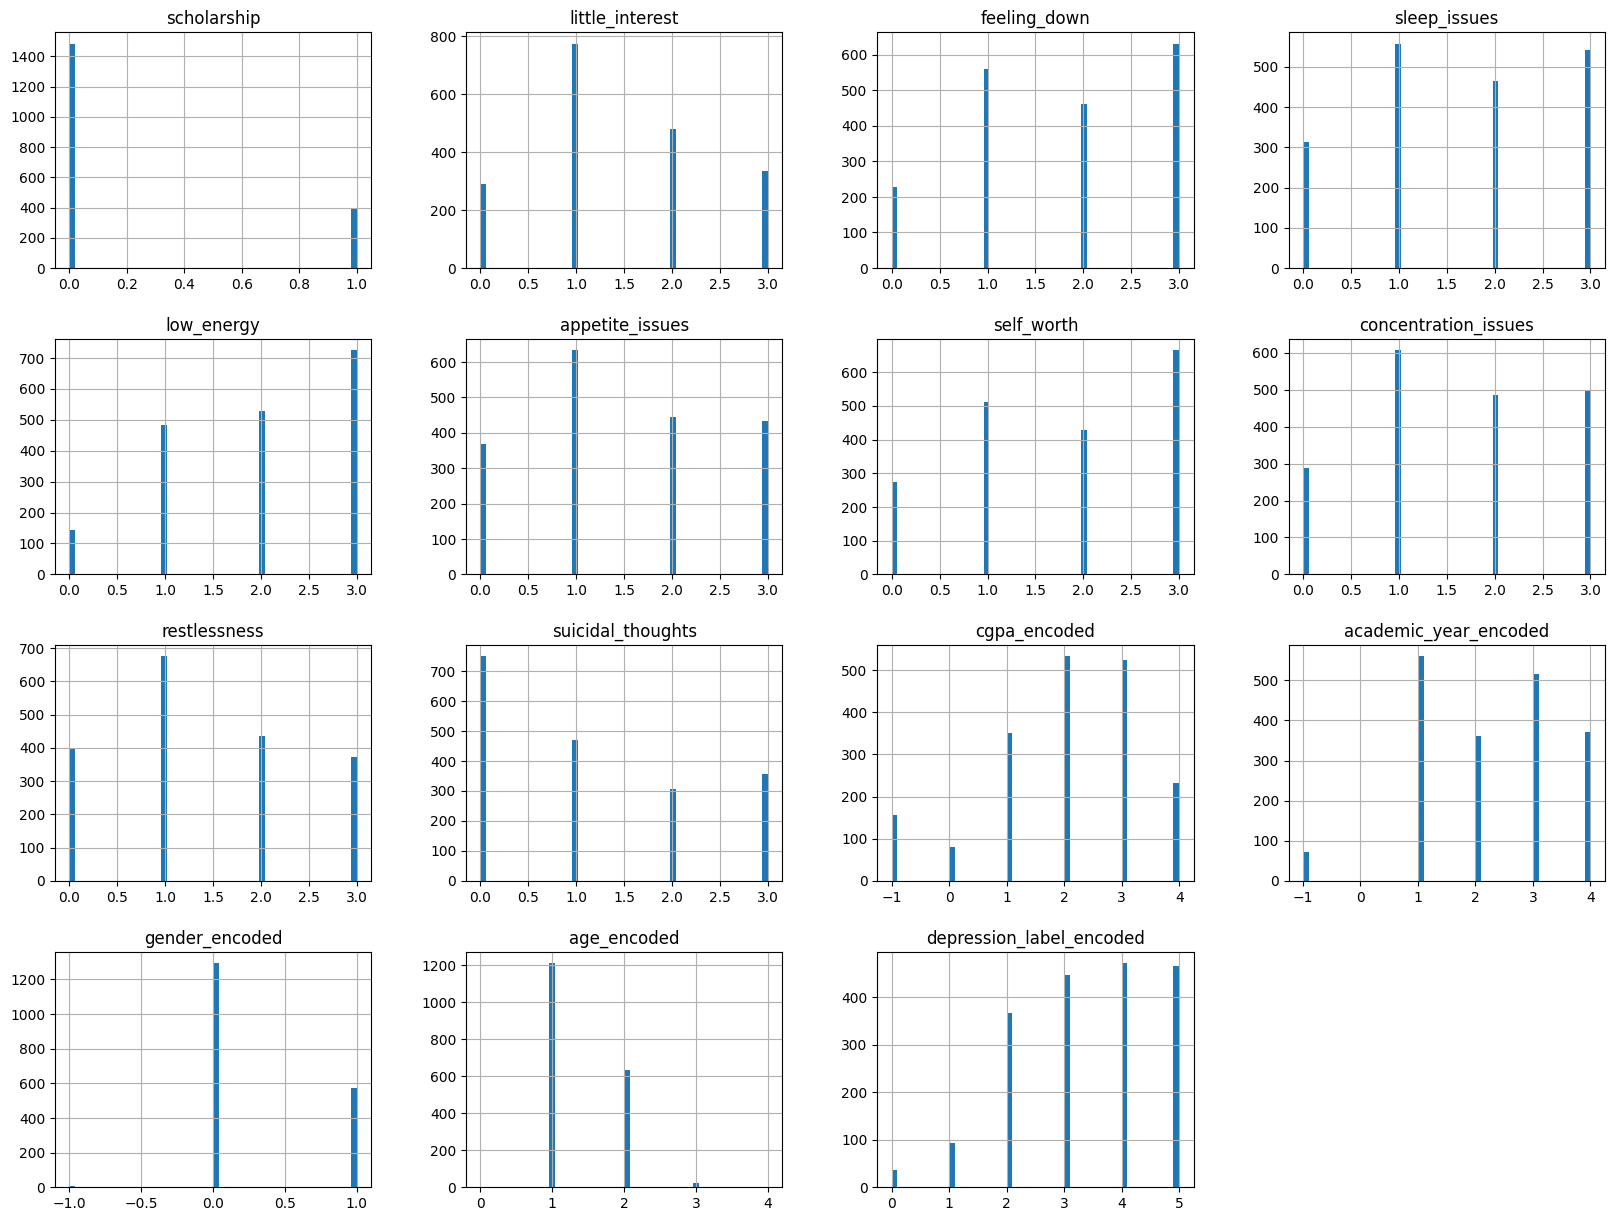

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

Percentage for depressed classes

In [6]:
depressed_perc = df['depression_label_encoded'].value_counts(normalize=True)*100
depressed_perc

depression_label_encoded
4    25.106383
5    24.787234
3    23.723404
2    19.521277
1     4.946809
0     1.914894
Name: proportion, dtype: float64

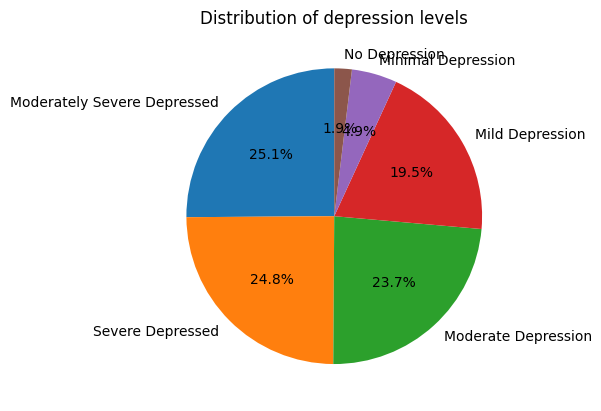

In [7]:
(depressed_perc).plot(kind='pie', labels=['Moderately Severe Depressed', 'Severe Depressed', 'Moderate Depression', 'Mild Depression', 'Minimal Depression', 'No Depression'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of depression levels')
plt.ylabel('')
plt.show()

Let's now explore correlation and multicollinearity

In [8]:
df.corr()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded,depression_label_encoded
scholarship,1.000000,0.019529,-0.001924,0.042032,0.031438,0.036690,0.003364,0.021844,0.016102,0.014546,0.143844,0.006010,0.056984,-0.009430,0.015128
little_interest,0.019529,1.000000,0.242797,0.193340,0.192118,0.176894,0.186546,0.188259,0.190248,0.190057,0.032787,0.041588,0.034327,0.016879,0.372535
feeling_down,-0.001924,0.242797,1.000000,0.536585,0.598660,0.465008,0.643103,0.540003,0.501952,0.505054,-0.028460,0.046480,0.103547,-0.011443,0.785745
sleep_issues,0.042032,0.193340,0.536585,1.000000,0.548522,0.475883,0.487712,0.481587,0.419753,0.367489,0.001850,0.024377,0.062902,-0.045955,0.694930
low_energy,0.031438,0.192118,0.598660,0.548522,1.000000,0.475144,0.550054,0.490603,0.441128,0.377911,0.020787,0.030578,0.083119,-0.033017,0.735784
appetite_issues,0.036690,0.176894,0.465008,0.475883,0.475144,1.000000,0.477738,0.451950,0.441935,0.414074,-0.006464,0.016239,0.074428,-0.017016,0.667234
self_worth,0.003364,0.186546,0.643103,0.487712,0.550054,0.477738,1.000000,0.574385,0.493794,0.518175,-0.087324,0.027673,0.087265,-0.030825,0.776148
concentration_issues,0.021844,0.188259,0.540003,0.481587,0.490603,0.451950,0.574385,1.000000,0.521674,0.424724,-0.035167,0.022650,0.054340,-0.007954,0.717738
restlessness,0.016102,0.190248,0.501952,0.419753,0.441128,0.441935,0.493794,0.521674,1.000000,0.481880,-0.031167,0.054462,0.026838,-0.016453,0.680153
suicidal_thoughts,0.014546,0.190057,0.505054,0.367489,0.377911,0.414074,0.518175,0.424724,0.481880,1.000000,-0.046733,0.030558,0.036382,-0.043207,0.649977


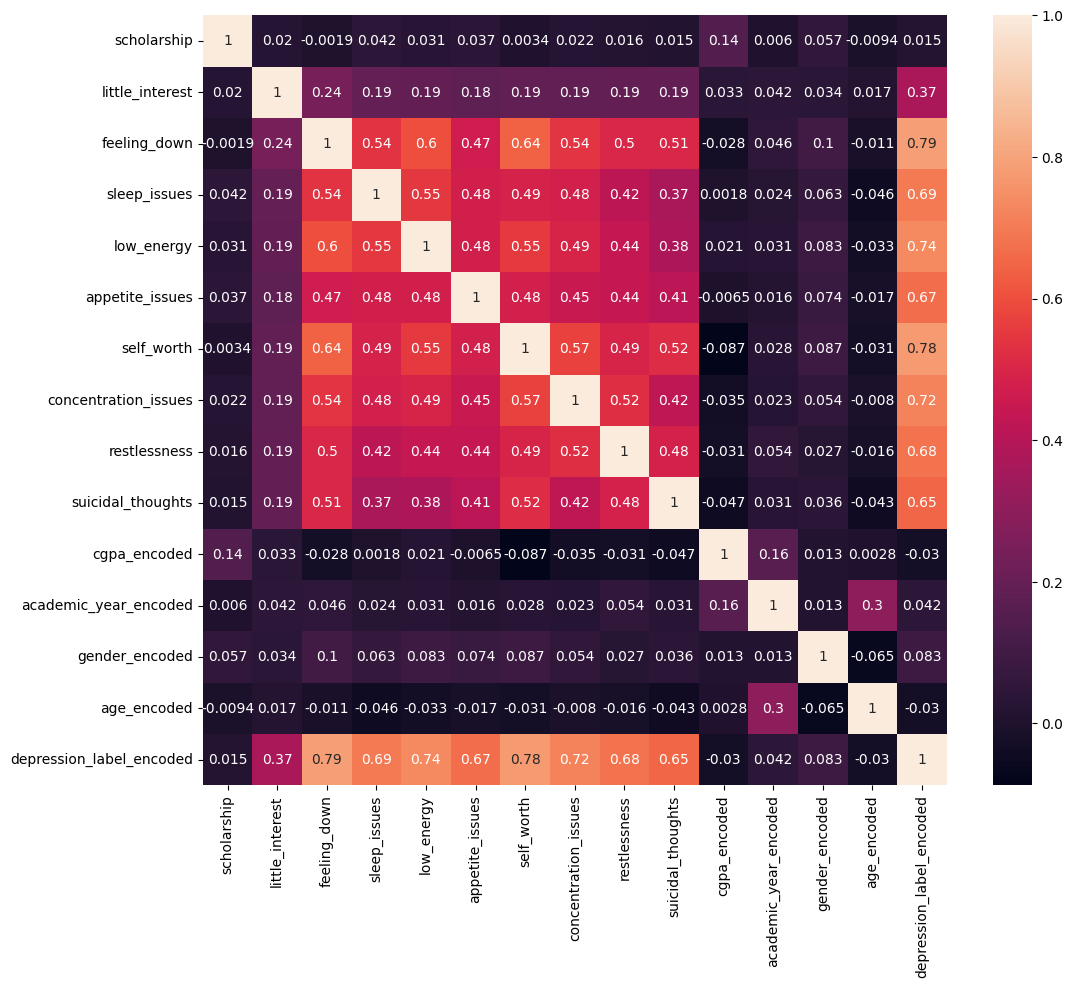

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Now, let's calculate and visualize 'appetite issues' on depression

In [11]:
appetite_issues=pd.DataFrame(df['appetite_issues'].value_counts())

In [12]:
appetite_issues

,count
appetite_issues,
1,634
2,445
3,432
0,369


In [13]:
appetite_issues.rename_axis('Dietary Habits Type', inplace=True)  
appetite_issues.columns = ['Total Count']

In [14]:
df.head()

,scholarship,little_interest,feeling_down,sleep_issues,low_energy,appetite_issues,self_worth,concentration_issues,restlessness,suicidal_thoughts,cgpa_encoded,academic_year_encoded,gender_encoded,age_encoded,depression_label_encoded
0,0,2,2,3,2,2,2,2,3,2,1,2,1,1,5
1,0,3,2,2,2,2,2,2,2,2,2,3,0,1,4
2,0,0,0,0,0,0,0,0,0,0,2,3,0,1,0
3,0,2,1,2,1,2,1,2,2,1,2,3,0,1,3
4,0,1,3,3,3,1,3,0,3,3,1,2,0,1,5


Analyzing how each feature might relate to depression_label (dependent variable/feature) in our dataset

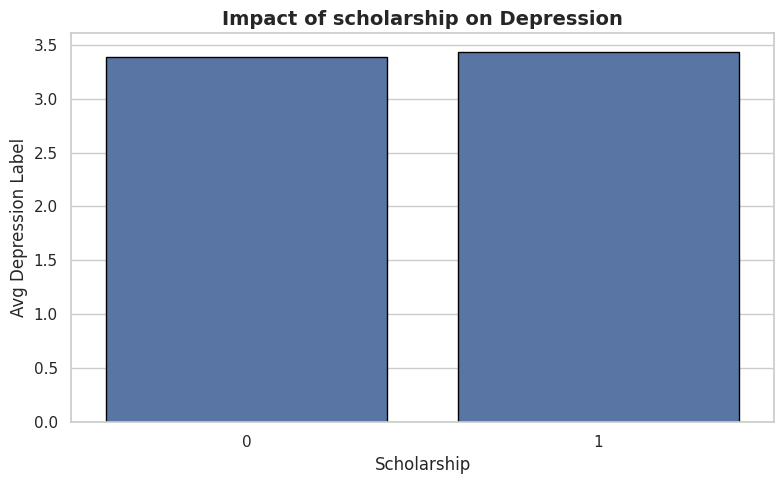

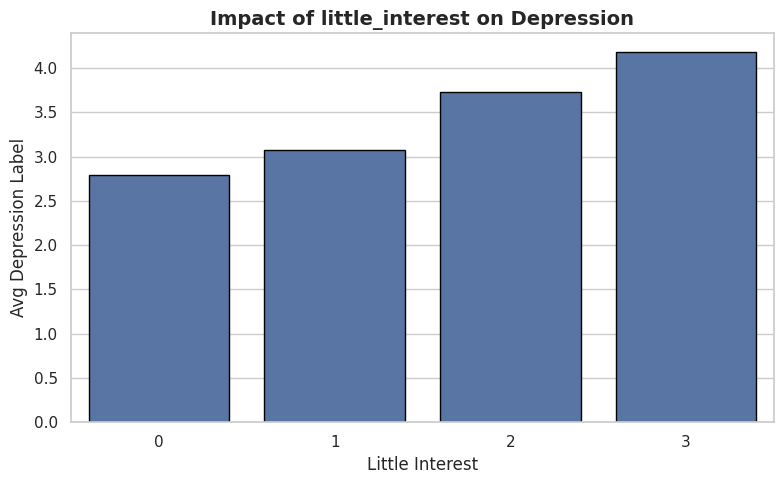

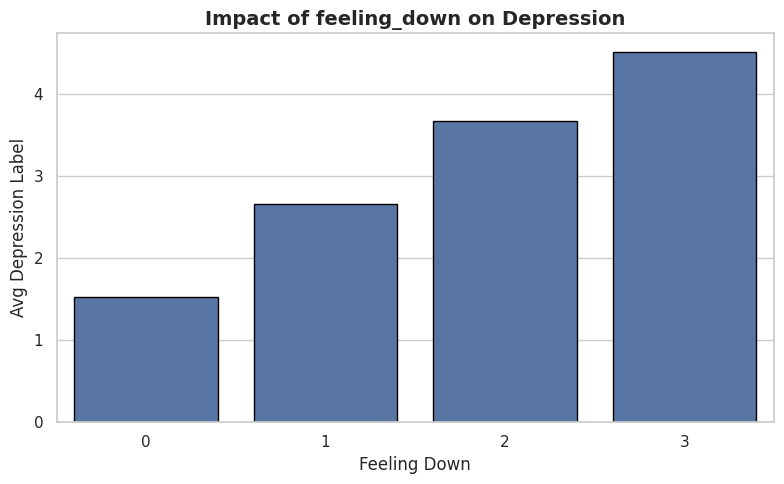

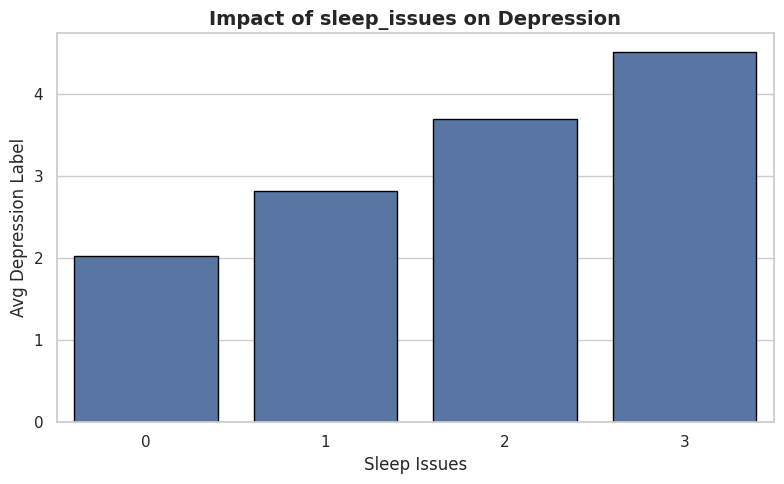

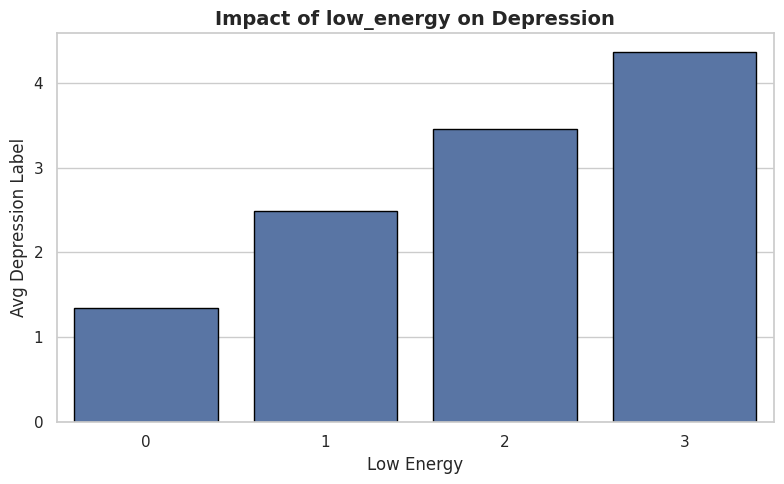

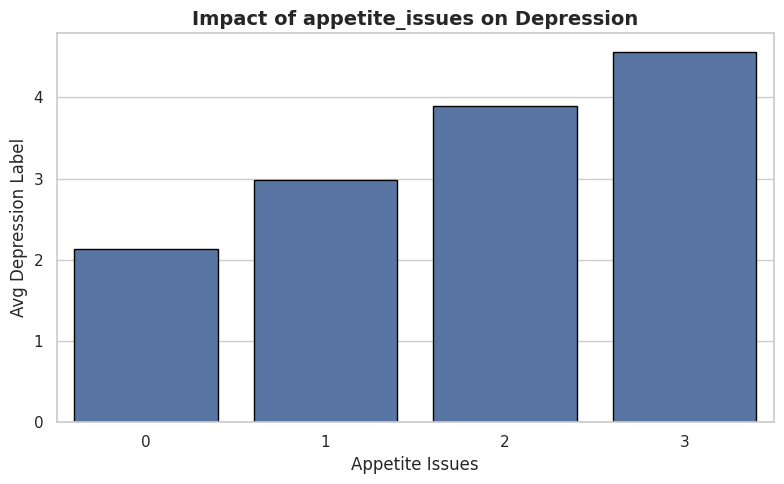

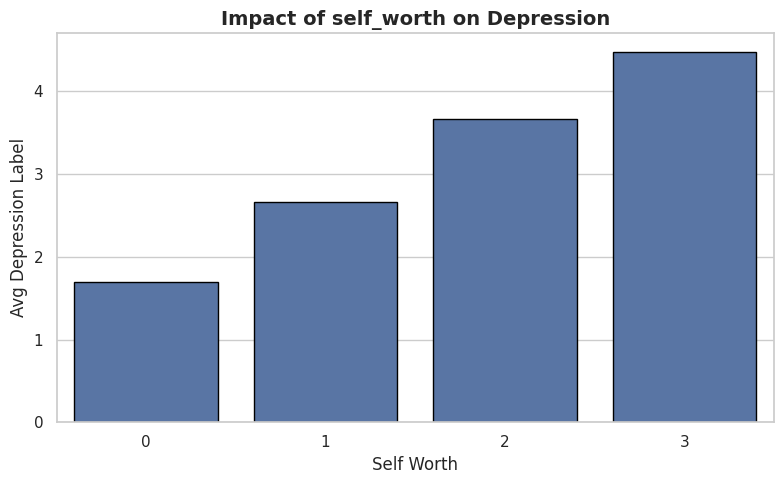

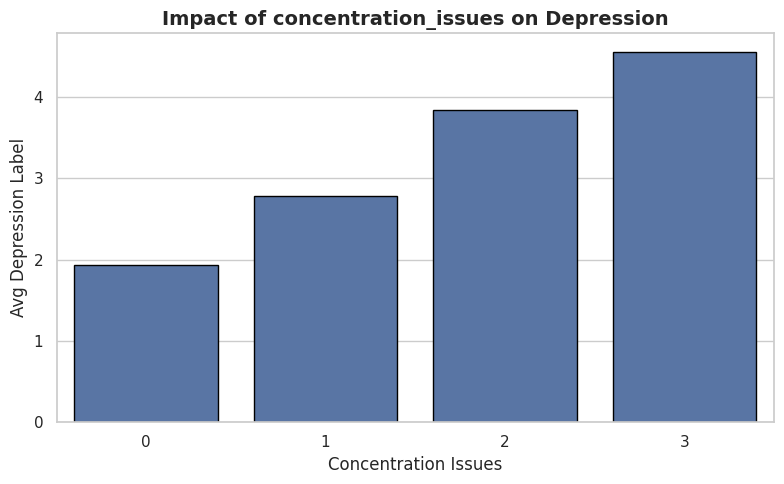

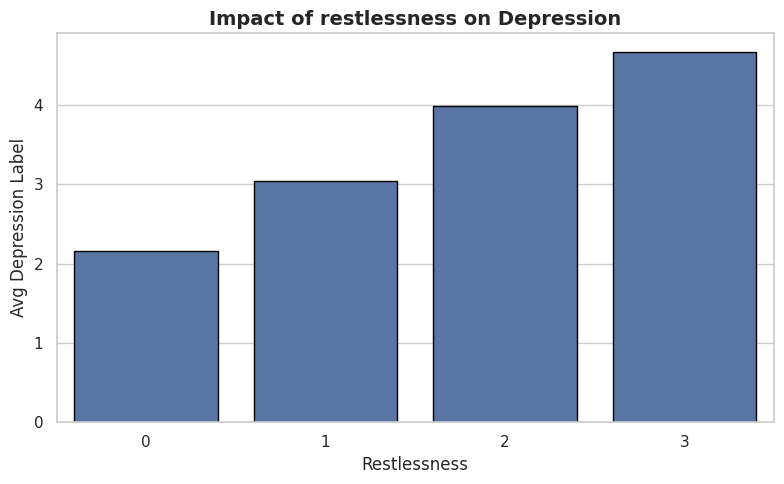

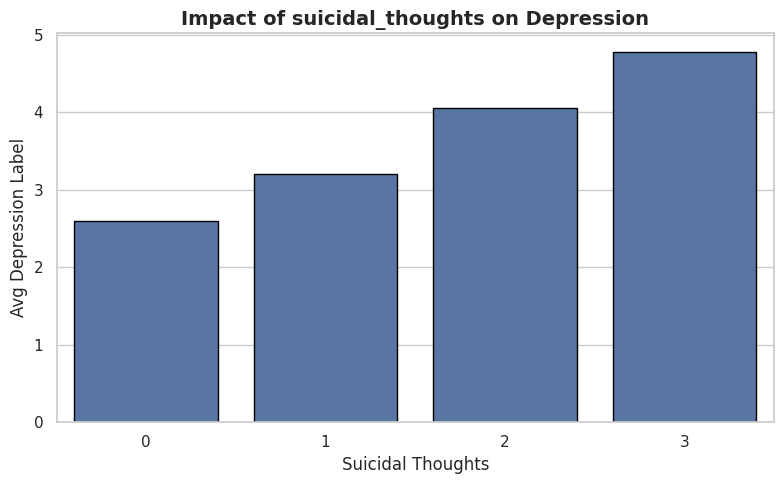

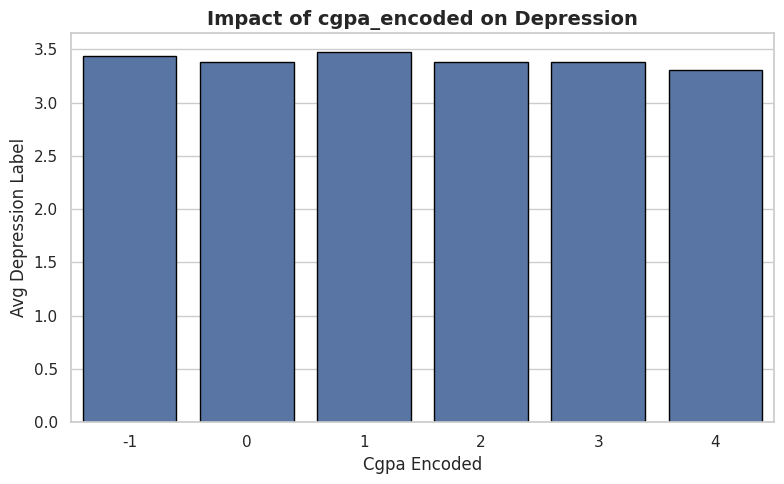

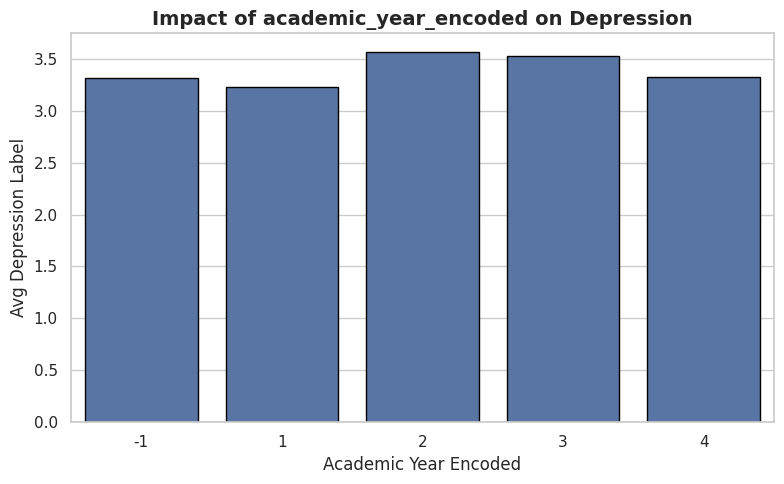

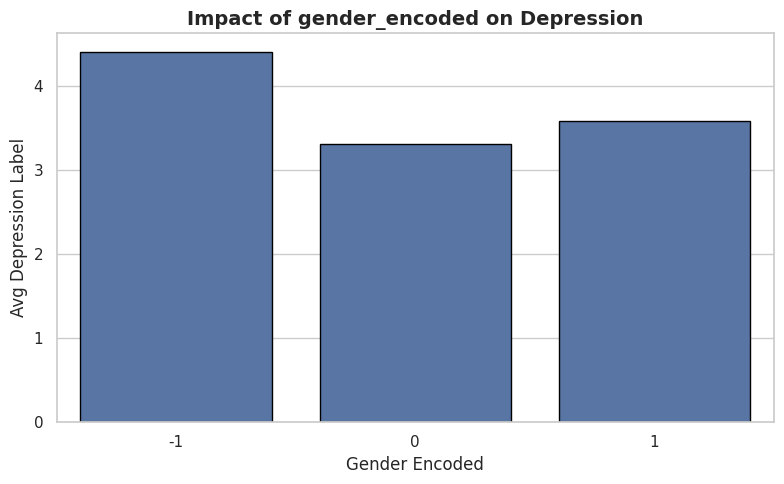

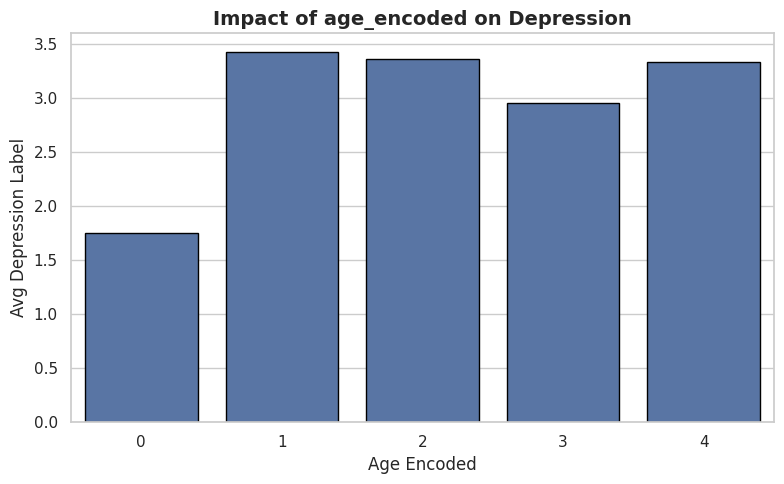

In [40]:
# List of features to compare against the target
features = [
    'scholarship', 'little_interest', 'feeling_down', 'sleep_issues',
    'low_energy', 'appetite_issues', 'self_worth', 'concentration_issues',
    'restlessness', 'suicidal_thoughts', 'cgpa_encoded',
    'academic_year_encoded', 'gender_encoded', 'age_encoded'
]

# Set style
sns.set(style='whitegrid')

# Loop through features and plot
for feature in features:
    plt.figure(figsize=(8, 5))
    # Group by feature and calculate mean depression label
    avg_depression = df.groupby(feature)['depression_label_encoded'].mean().reset_index()
    # Barplot
    sns.barplot(x=feature, y='depression_label_encoded', data=avg_depression, edgecolor='black')
    plt.title(f'Impact of {feature} on Depression', fontsize=14, weight='bold')
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Avg Depression Label', fontsize=12)
    plt.tight_layout()
    plt.show()


you can see that academic year, and cgpa appears to have little to no impact on depression levels in this dataset.